In [14]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset
df = pd.read_csv('Advertising.csv')

In [3]:
# duplicates
duplicates = df[df.duplicated()]
print("Duplicates:")
print(duplicates)

Duplicates:
Empty DataFrame
Columns: [daily_time_spent, Age, area_income, daily_internet_usage, ad_topic_line, City, is_male, Country, Timestamp, clicked_on_ad, Hour, Day_of_Week, Month, Income_Category, Age_Category, Internet_Usage_Category, Time_Spent_Category]
Index: []


In [5]:
# data quality report
data_quality_report = df.describe()
print("\nData Quality Report:")
print(data_quality_report)


Data Quality Report:
       daily_time_spent         Age  area_income  daily_internet_usage  \
count        952.000000  965.000000   966.000000            983.000000   
mean           0.548727    0.405502     0.626310              0.453362   
std            0.269088    0.209508     0.204270              0.265856   
min            0.000000    0.000000     0.000000              0.000000   
25%            0.317610    0.238095     0.508122              0.204353   
50%            0.598759    0.380952     0.657020              0.471425   
75%            0.779109    0.547619     0.786271              0.687583   
max            1.000000    1.000000     1.000000              1.000000   

           is_male  clicked_on_ad        Hour  Day_of_Week       Month  \
count  1000.000000     1000.00000  979.000000   979.000000  979.000000   
mean      0.481000        0.50000    0.506684     3.059244    3.828396   
std       0.499889        0.50025    0.302595     2.001677    1.930058   
min       0.000

In [6]:
# missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
daily_time_spent           48
Age                        35
area_income                34
daily_internet_usage       17
ad_topic_line              51
City                       65
is_male                     0
Country                    46
Timestamp                  21
clicked_on_ad               0
Hour                       21
Day_of_Week                21
Month                      21
Income_Category            34
Age_Category               35
Internet_Usage_Category    17
Time_Spent_Category        48
dtype: int64


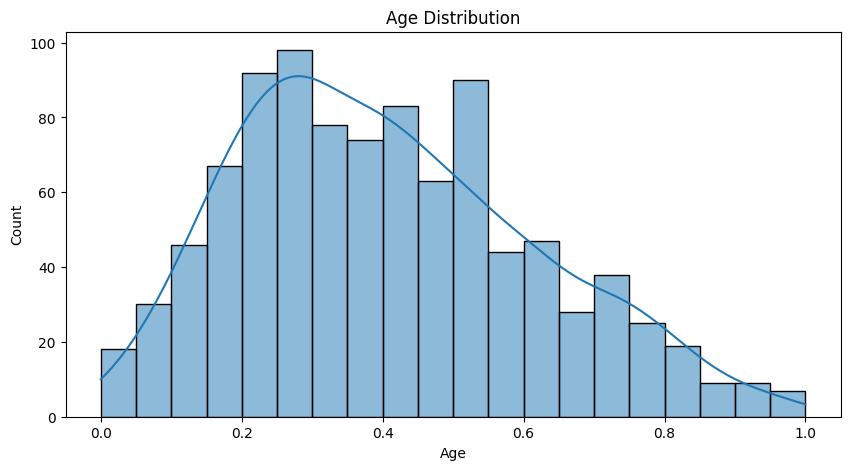

In [15]:
# histogram for 'Age' column
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

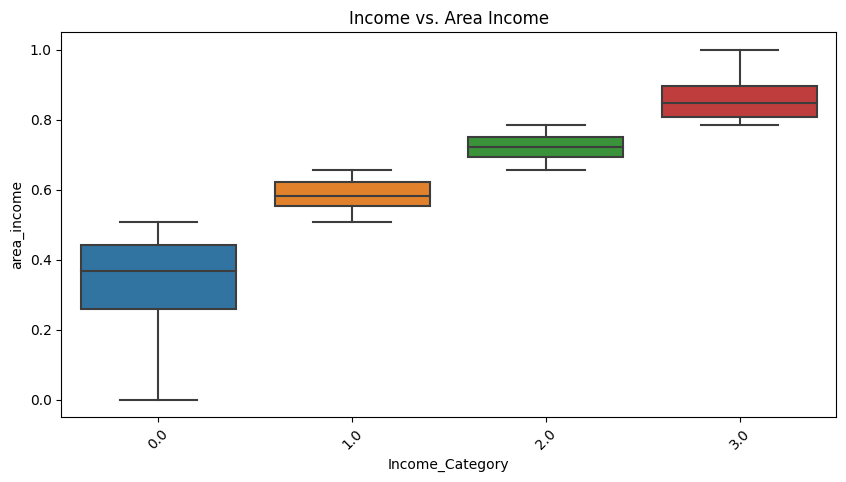

In [16]:
# outliers using box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Category', y='area_income', data=df)
plt.title('Income vs. Area Income')
plt.xticks(rotation=45)
plt.show()

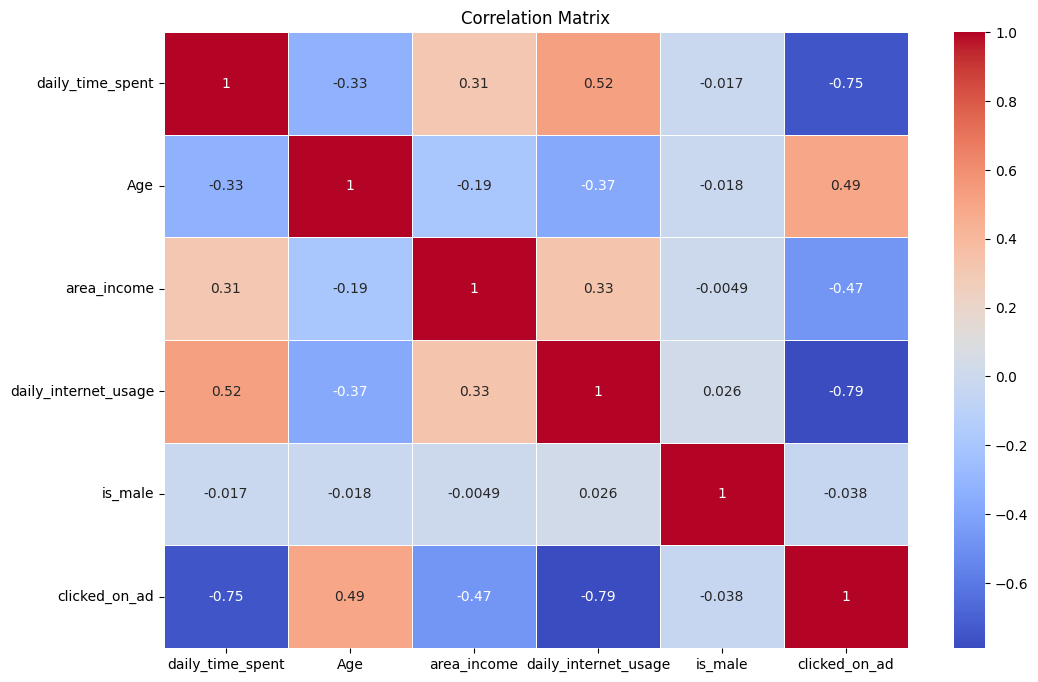

In [17]:
# correlation matrix
df_sub = df[['daily_time_spent', 'Age', 'area_income', 'daily_internet_usage', 'is_male', 'clicked_on_ad']]
correlation_matrix = df_sub.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

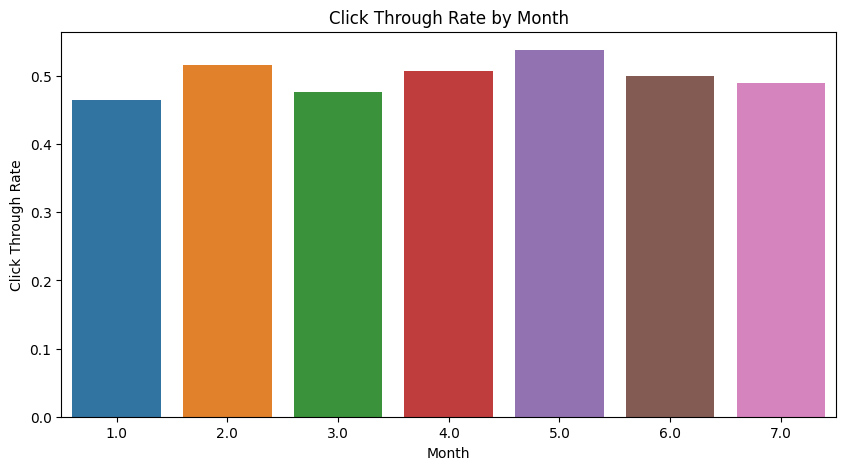

In [18]:
# additional unique visuals
# 1. Bar chart for 'Month' vs. 'clicked_on_ad'
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='clicked_on_ad', data=df, ci=None)
plt.title('Click Through Rate by Month')
plt.xlabel('Month')
plt.ylabel('Click Through Rate')
plt.show()

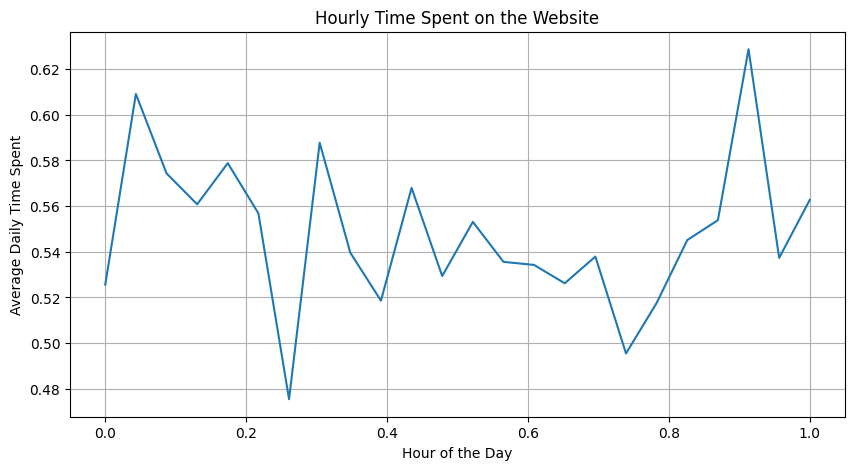

In [19]:
# 2. Line graph for 'Hour' vs. 'daily_time_spent'
hourly_time_spent = df.groupby('Hour')['daily_time_spent'].mean()
plt.figure(figsize=(10, 5))
hourly_time_spent.plot()
plt.title('Hourly Time Spent on the Website')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Daily Time Spent')
plt.grid()
plt.show()

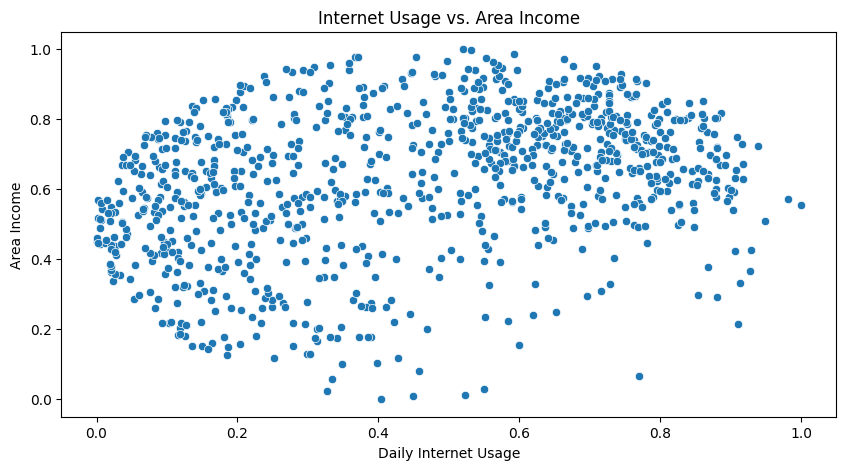

In [20]:
# 3. Scatter plot for 'daily_internet_usage' vs. 'area_income'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='daily_internet_usage', y='area_income', data=df)
plt.title('Internet Usage vs. Area Income')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Area Income')
plt.show()

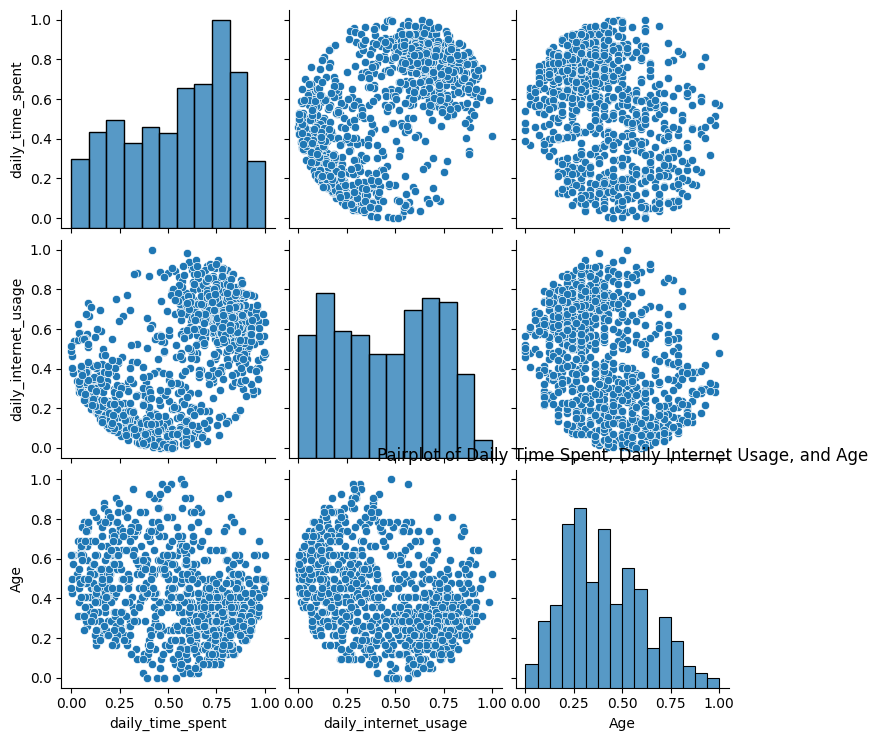

In [21]:
# 4. Pairplot for selected columns
sns.pairplot(df[['daily_time_spent', 'daily_internet_usage', 'Age']])
plt.title('Pairplot of Daily Time Spent, Daily Internet Usage, and Age')
plt.show()